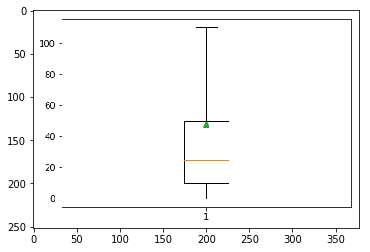

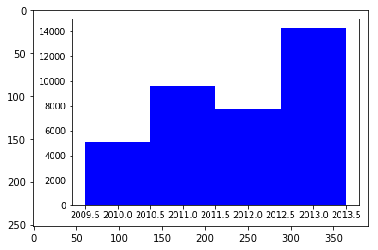

In [1]:
import pandas
import matplotlib.pyplot as plt
import datetime
import matplotlib.image as mpimg

#Exploratory Analysis: 1) Box plot of mean, median donations for each project.
#There are very few projects that get high(~26000$) total donations but the 
#median donation across all projects is as low as 30$
#2) Histogram of yearly distribution of exciting projects. Notice that there is 
#a dip in the number from year 2011 to 2012. 
#3)The dataset seems to be missing entries before 2010.

image = mpimg.imread("pic(1).png")
plt.imshow(image)
plt.show()

image = mpimg.imread("proj_vs_year.png")
plt.imshow(image)
plt.show()

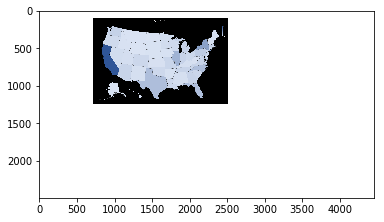

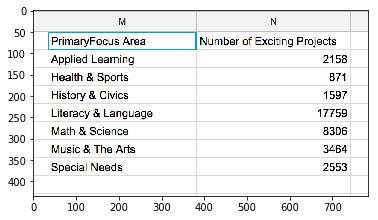

In [2]:
#Data Story: 1) Find the primary focus area of exciting projects. This can also
#be repeated to find which projects get the most funding. This could be a useful
#analysis to look into which focus areas are most exciting and can get away with 
#lesser fundraising efforts and which areas need fundraising
#2) Heatmaps of exciting projects over different areas in the United States and 
#number of donors in different areas were compared. Results show that the states 
#that are producing more number of exciting projects are those with more number
#donors. This analysis could also be helpful in helping project partners decide 
#which places to target for their fundraising campaigns.
#In conclusion, the analyses in my Data Story revolves around helping project partners better
#their fundraising approach.

#Questions for the Project Partner: 1)Why is there no record of exciting projects
#before 2010? Is there a record of these in some other source?
#2) Why was there a dip in number of exciting projects from 2011-12? Did you change something?
#3) What strategy have you been following for fundraising so far? Do you need 
#more inputs apart from the inputs that my data story provides?
#4)How did you conclude that the five fields mentioned determine the "excitingness"
#of a project? Don't you think there are other fields out there like project proposal
#(project title+description+essay), focus area or some other field that could
#govern the same?

image = mpimg.imread("Picture1.png")
plt.imshow(image)
plt.show()

image = mpimg.imread("table.png")
plt.imshow(image)
plt.show()


In [ ]:
#Modelling: Extract the most prevalent concepts present in the project description of an 
#exciting project. Also provides some keywords that could be present in the description
#The method used is Latent Semantic Analysis which involves building a word vs
#concept(in our case the short decription) matrix, performing Singular Value
#Decomposition to pick out only the most prevalent concepts. In the interest of 
#time,I have performed a TruncatedSVD using sklearn, which allowed me to preset 
#the number of concepts to choose and also the number of iterations. Time permitting,
#I would have performed a full SVD, to get the U,S and V matrices and picked out 
#the dominating concepts based on the square of the singular matrix values.
#This analysis could also be extended to include the title and also essay, in 
#addition to the short description and determine the key concepts and keywords
#that are present in project proposals that get fully funded. I initially wanted 
#to do this analysis but the feature matrix would have taken too long to build
#given the large number of fully funded projects and text mining of the essays.

#------------------Exploratory Analysis and Data Story-------------------------
#Mean, median donations to exciting projects      
dollar_amount = []
for i in range(3097989):#length of d
    if d.projectid[i] in exciting_proj_ids:
        dollar_amount.append(d.donation_total[i])
plt.boxplot(dollar_amount,showcaps=True,showbox=True,showmeans=True)

date_of_projects = []
for i in range(664098):#length of p
    if p.projectid[i] in exciting_proj_ids:
        date_of_projects.append(p.date_posted[i])
        
#Get yearly distribution of exciting projects        
year_of_projects=[]
for i in date_of_projects:
    datee = datetime.datetime.strptime(i, "%Y-%m-%d")  
    year_of_projects.append(datee.year)
year_vs_numproj={}
for i in range(len(year_of_projects)):
    if year_of_projects[i] in year_vs_numproj.keys():
        year_vs_numproj[year_of_projects[i]] +=1
    else:
        year_vs_numproj[year_of_projects[i]] = 1
plt.bar(year_vs_numproj.keys(), year_vs_numproj.values(),1.0, color='b')     
plt.show()

#Yearly heatmap for exciting projects vs Area
#Yearly heatmap for No.of.donors vs Area
#Compare the two maps       
project_states = {}

for i in range(664098):#length of p
    datee = datetime.datetime.strptime(p.date_posted[i], "%Y-%m-%d")  
    if datee.year == 2013:
        if p.projectid[i] in exciting_proj_ids:
            if p.school_state[i] in project_states.keys():
                project_states[p.school_state[i]] += 1
            else:
                project_states[p.school_state[i]] = 1

for x in project_states.keys():
    print(x+','+str(project_states[x]))
    
#Primary focus area vs number of exciting projects
focus_vs_proj = {}
for i in range(664098):
    if p.projectid[i] in exciting_proj_ids:
        if p.primary_focus_area[i] in focus_vs_proj.keys():
            focus_vs_proj[p.primary_focus_area[i]] += 1
        else:
            focus_vs_proj[p.primary_focus_area[i]] = 1

#-----------------------Modelling----------------------------------           
#LSA on short description to find top concepts present in descriptions of
#exciting projects
import pandas
import string
from nltk.tokenize import RegexpTokenizer


def preprocess(sentence):
	sentence = sentence.lower()
	tokenizer = RegexpTokenizer(r'\w+')
	tokens = tokenizer.tokenize(sentence)
	return tokens

a=pandas.read_csv('outcomes.csv', sep=',')

exciting_proj_ids  = []

for i in range(619326):
    if a.is_exciting[i] == 't':
        exciting_proj_ids.append(a.iloc[i][0])

e=pandas.read_csv('essays.csv', sep=',')

#Building word vs description matrix
import numpy as np
feature_mat = np.zeros((1, 36710))

row_num = 0
column_num = -1
vocab = {'a':0}
replace_punctuation = string.maketrans(string.punctuation, ' '*len(string.punctuation))

for i in range(664098):
    if e.projectid[i] in exciting_proj_ids:
        essay = e.short_description[i]
        essay = essay.translate(replace_punctuation)
        essay = preprocess(essay)
        column_num += 1
        for word in essay:
            try:
                feature_mat[vocab[word]][column_num] += 1
            except:
                temp = np.zeros((1, 36710))
                feature_mat = np.concatenate((feature_mat, temp), axis = 0)
                row_num += 1
                vocab[word] = row_num
                feature_mat[vocab[word]][column_num] += 1
                
#Truncated SVD on the feature matrix

from sklearn.utils.extmath import randomized_svd

U, Sigma, VT = randomized_svd(feature_mat, 
                              n_components=15,
                              n_iter=5,
                              random_state=None)

# Get Top-Words From Each Concept:

idx1 = (-U[:, 1]).argsort()[:5]
idx2 = (-U[:, 2]).argsort()[:5]

#concept 1:
for x in vocab.keys():
    if vocab[x] in list(idx1):
        print(x)
# WITH A SMALL NUMBER OF RUNS, TOP WORD INDICES IN VOCAB: 50, 148, 2, 71, 365

#concept 2:      
for x in vocab.keys():
    if vocab[x] in list(idx2):
        print(x)
# WITH A SMALL NUMBER OF RUNS, TOP WORD INDICES IN VOCAB: 0, 2, 31, 117, 158